##Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [ ]:
pwd

'/content'

##Dataset Loading

In [ ]:
data=pd.read_csv('/content/abalone.csv')

In [ ]:
data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [ ]:

Age=2+data.Rings
data["Age"]=Age
data=data.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})
data=data.drop(columns=["Rings"],axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,17
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,9
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,11
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,12
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,9


In [ ]:
data.shape

(4177, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Age             4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


##Data Pre-processing

In [ ]:
data.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole_weight      False
Shucked_weight    False
Viscera_weight    False
Shell_weight      False
Age               False
dtype: bool

In [ ]:
data.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,17
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,9
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,11
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,12
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,9
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,10
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,22
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,18
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,11
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,21


##Descriptive Satistics

In [ ]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,3.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,10.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,11.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,13.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,31.000000


In [ ]:
data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [ ]:
data.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

##Visualization

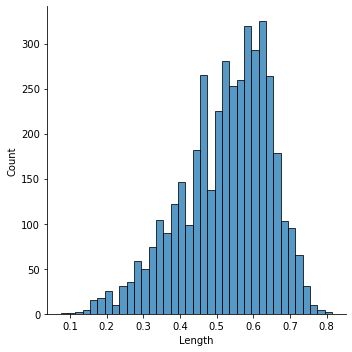

In [ ]:
sns.displot(data.Length)

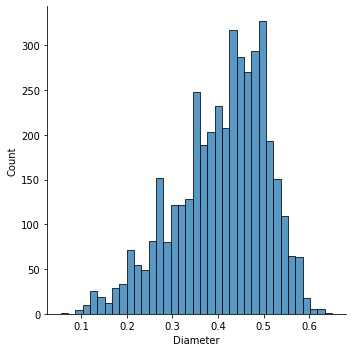

In [ ]:
sns.displot(data.Diameter)

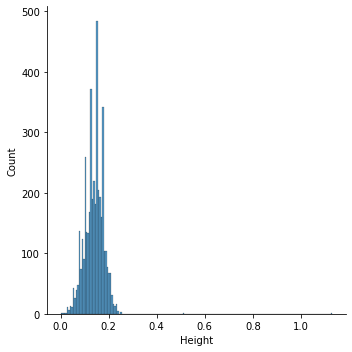

In [ ]:
sns.displot(data.Height)

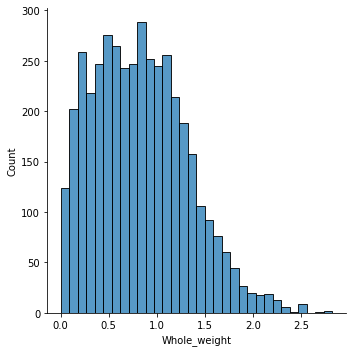

In [ ]:
sns.displot(data.Whole_weight)

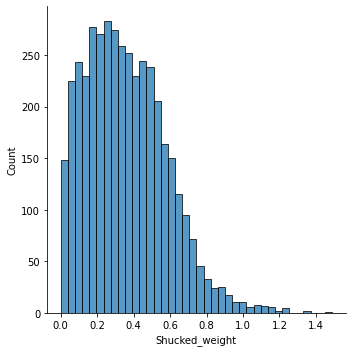

In [ ]:
sns.displot(data.Shucked_weight)

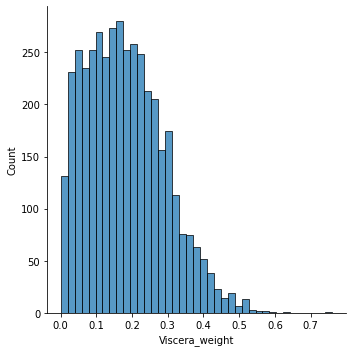

In [ ]:
sns.displot(data.Viscera_weight)

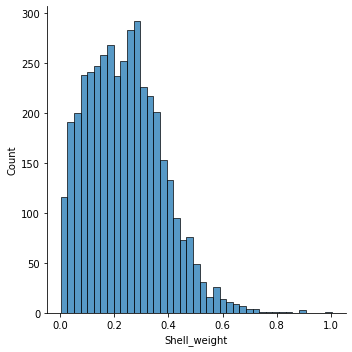

In [ ]:
sns.displot(data.Shell_weight)

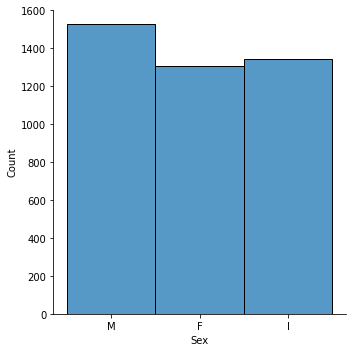

In [ ]:
sns.displot(data.Sex)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


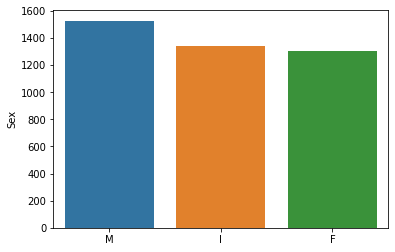

In [ ]:
sns.barplot(data.Sex.value_counts().index,data.Sex.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


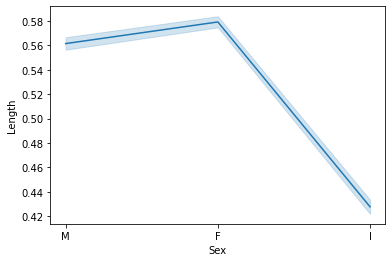

In [ ]:
sns.lineplot(data.Sex,data.Length)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


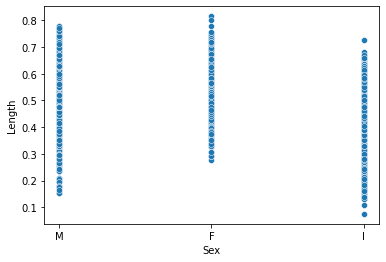

In [ ]:
sns.scatterplot(data.Sex,data.Length)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


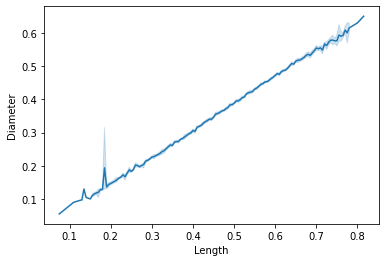

In [ ]:
sns.lineplot(data.Length,data.Diameter)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


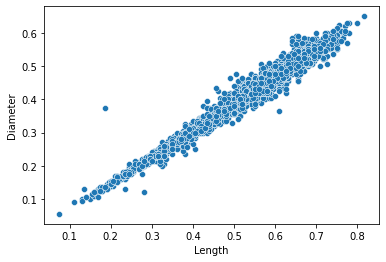

In [ ]:
sns.scatterplot(data.Length,data.Diameter)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


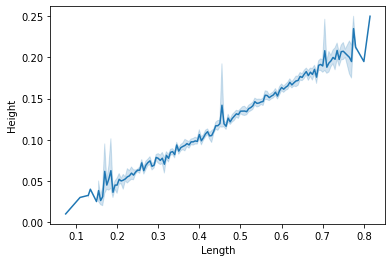

In [ ]:
sns.lineplot(data.Length,data.Height)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


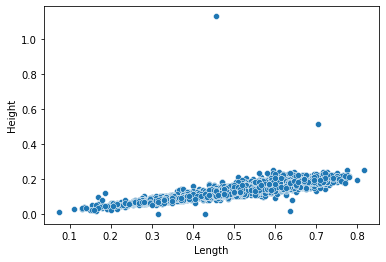

In [ ]:
sns.scatterplot(data.Length,data.Height)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


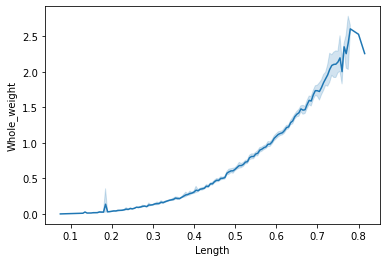

In [ ]:
sns.lineplot(data.Length,data.Whole_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


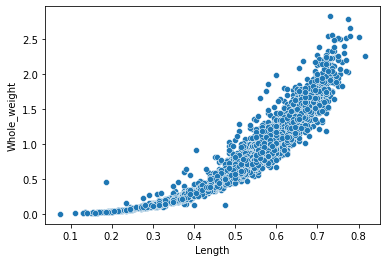

In [ ]:
sns.scatterplot(data.Length,data.Whole_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


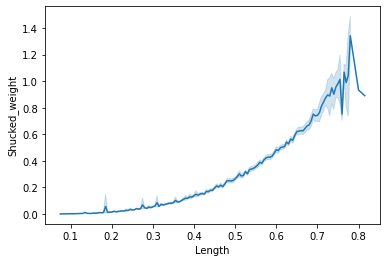

In [ ]:
sns.lineplot(data.Length,data.Shucked_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


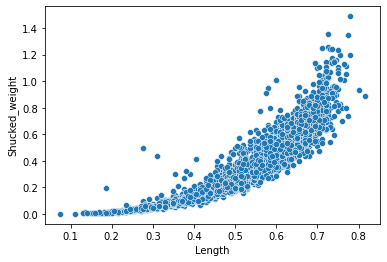

In [ ]:
sns.scatterplot(data.Length,data.Shucked_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


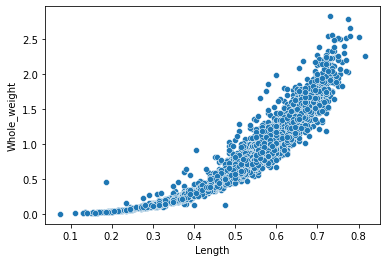

In [ ]:
sns.scatterplot(data.Length,data.Whole_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


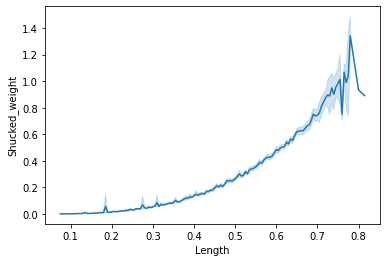

In [ ]:
sns.lineplot(data.Length,data.Shucked_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


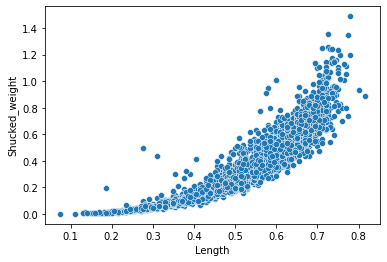

In [ ]:
sns.scatterplot(data.Length,data.Shucked_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


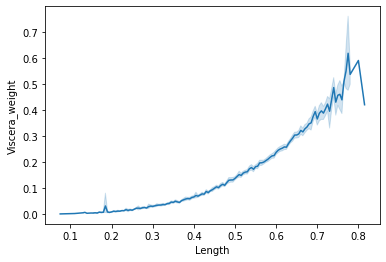

In [ ]:
sns.lineplot(data.Length,data.Viscera_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


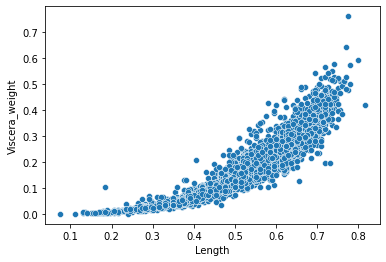

In [ ]:
sns.scatterplot(data.Length,data.Viscera_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


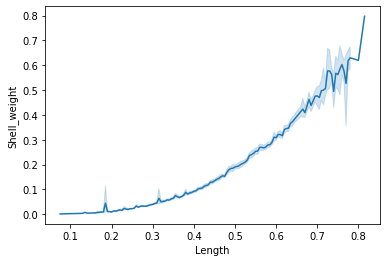

In [ ]:
sns.lineplot(data.Length,data.Shell_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


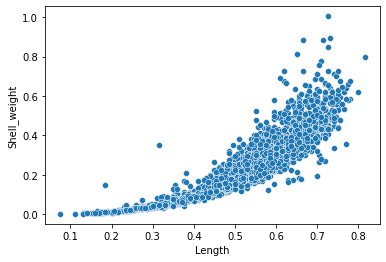

In [ ]:
sns.scatterplot(data.Length,data.Shell_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


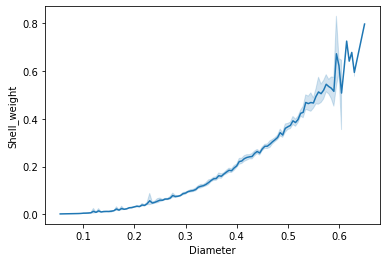

In [ ]:
sns.lineplot(data.Diameter,data.Shell_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


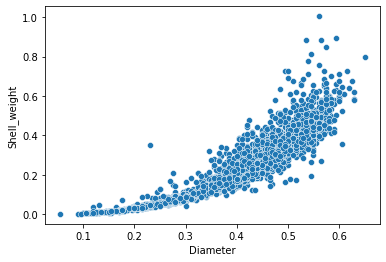

In [ ]:
sns.scatterplot(data.Diameter,data.Shell_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


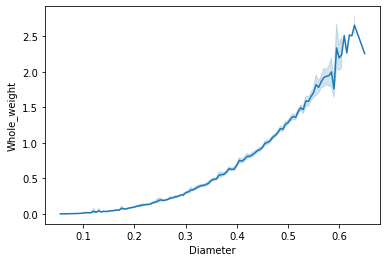

In [ ]:
sns.lineplot(data.Diameter,data.Whole_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


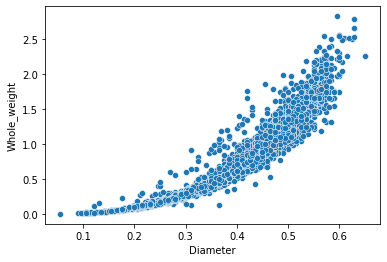

In [ ]:
sns.scatterplot(data.Diameter,data.Whole_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


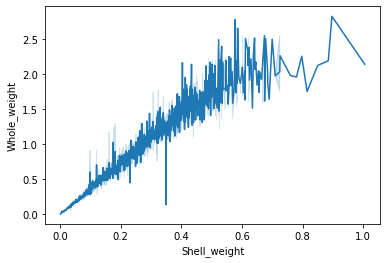

In [ ]:
sns.lineplot(data.Shell_weight,data.Whole_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


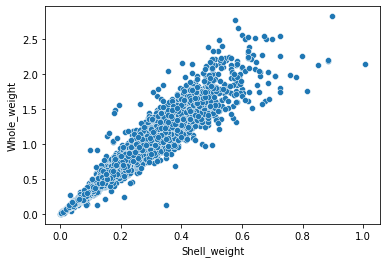

In [ ]:
sns.scatterplot(data.Shell_weight,data.Whole_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


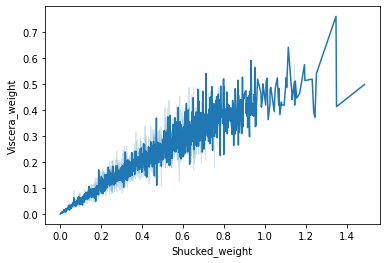

In [ ]:
sns.lineplot(data.Shucked_weight,data.Viscera_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


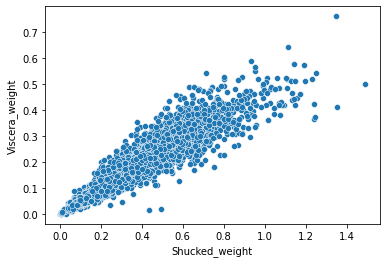

In [ ]:
sns.scatterplot(data.Shucked_weight,data.Viscera_weight)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41e48a4890>,
      dtype=object)

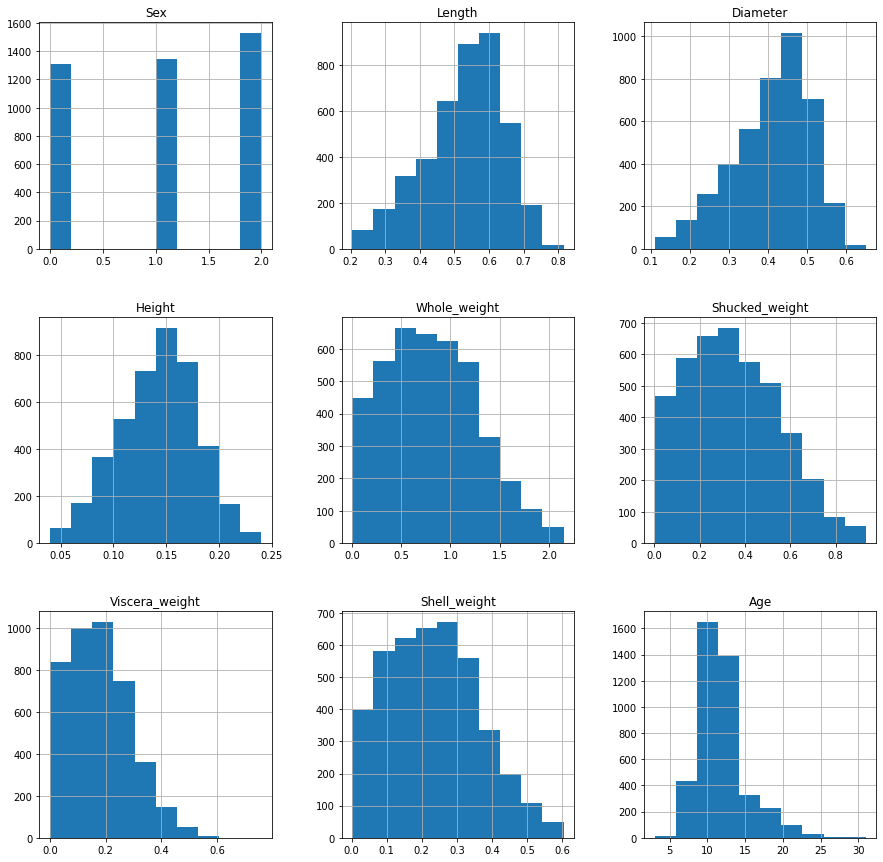

In [ ]:
data.hist(figsize=(15,15))

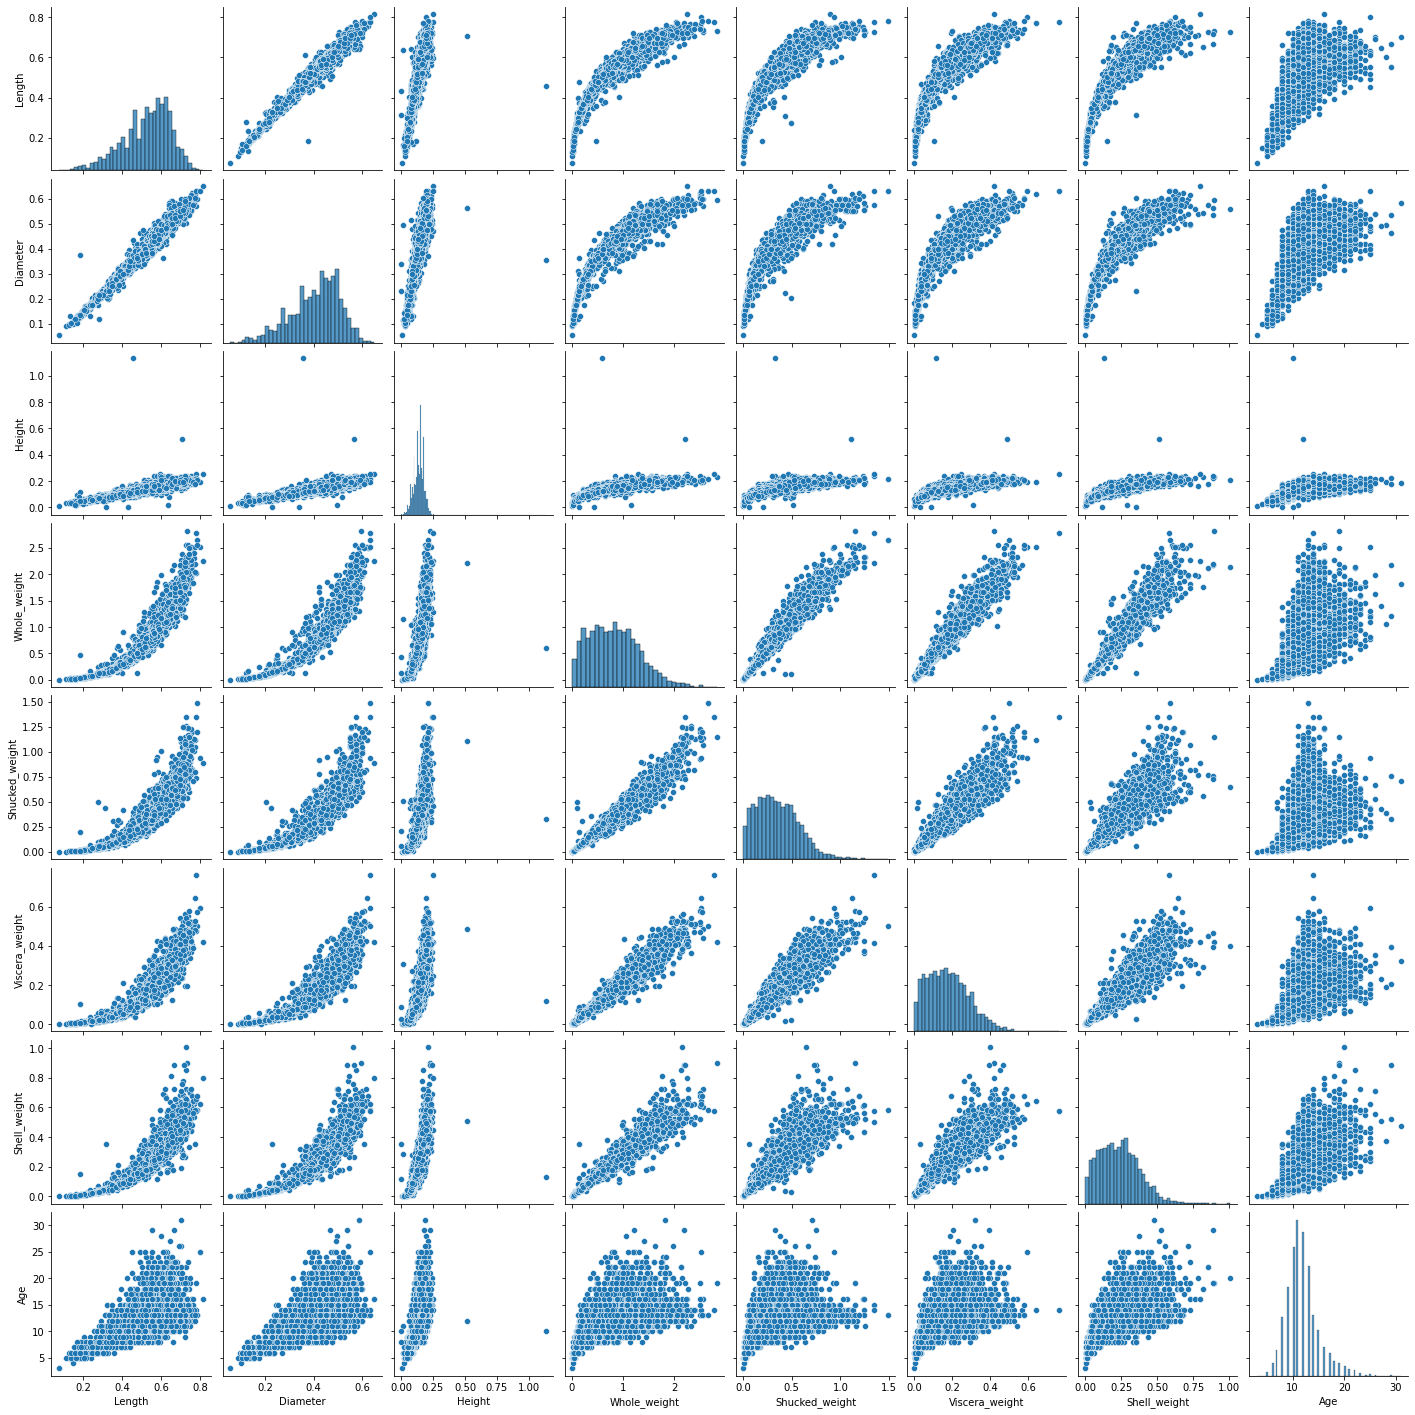

In [ ]:
sns.pairplot(data)

##Handling Outliers

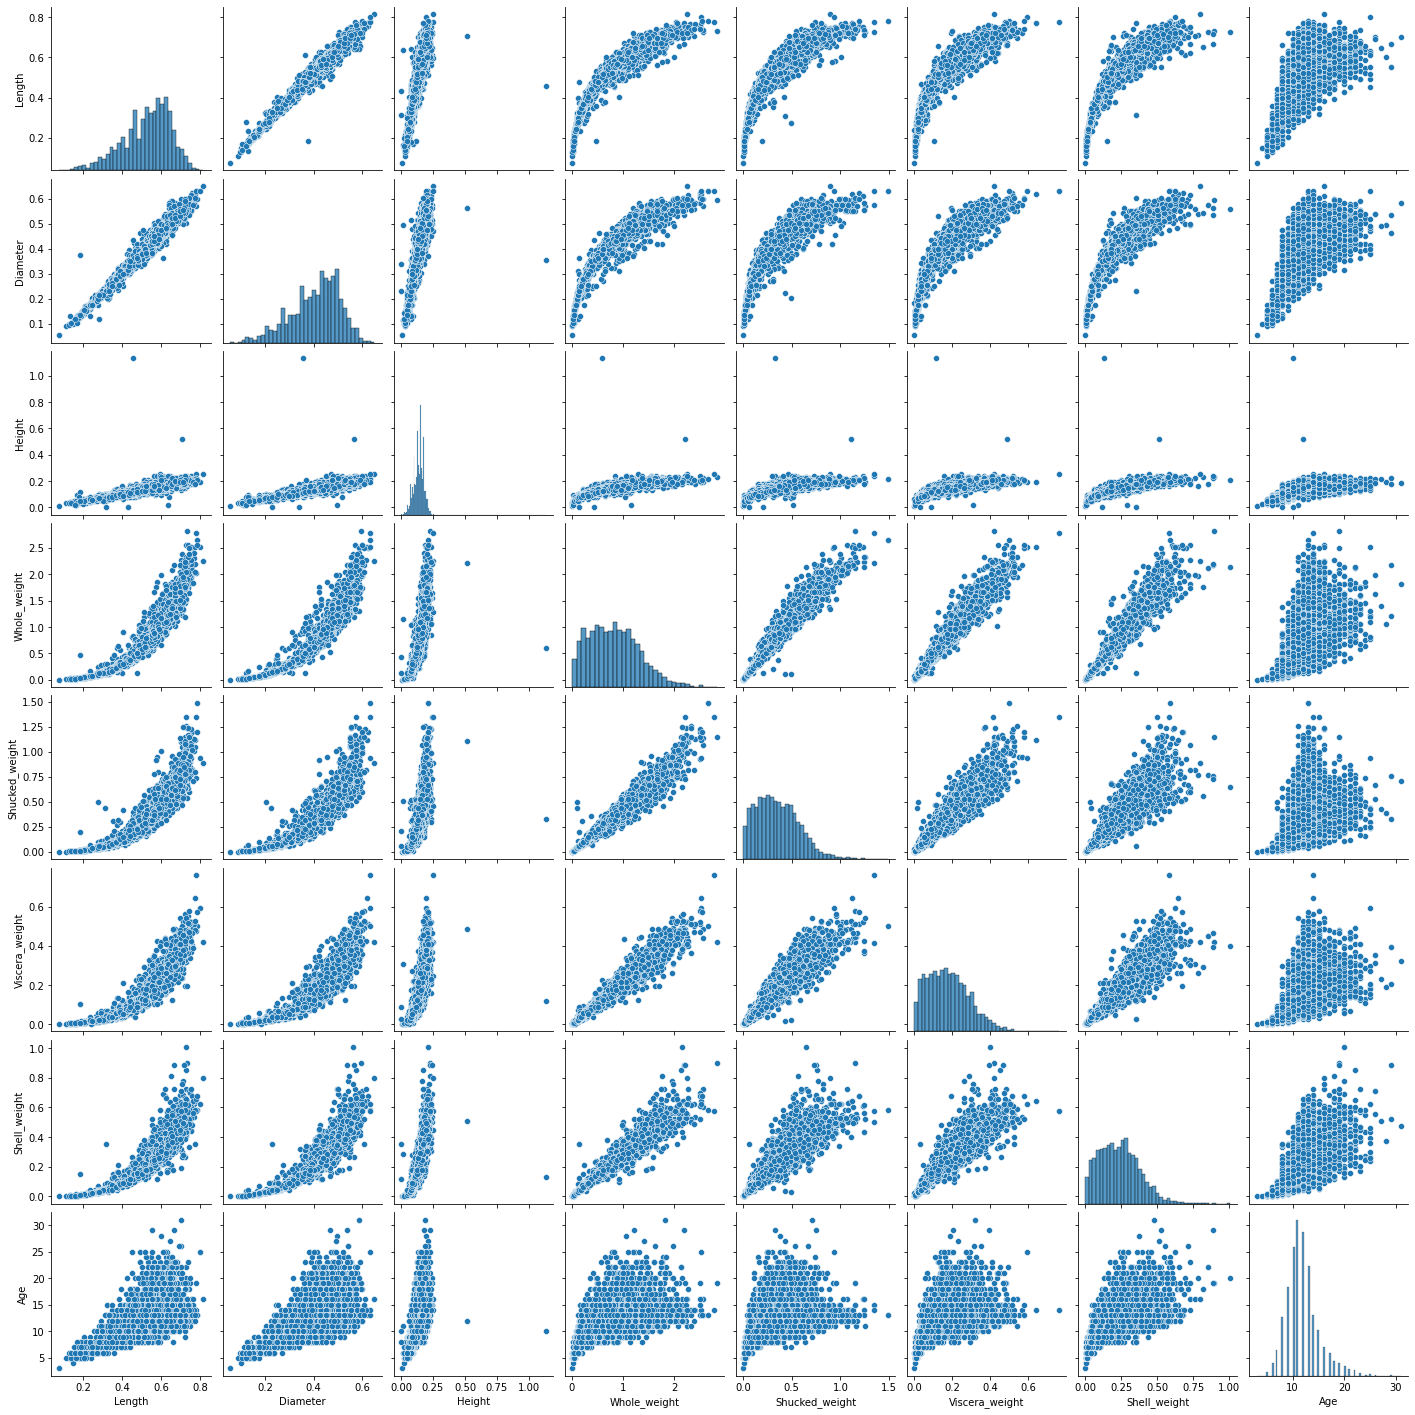

In [ ]:
sns.pairplot(data)

In [ ]:
q1=data.Length.quantile(0.25)  #(Q1)
q3=data.Length.quantile(0.75)  #(Q3)
IQR=q3-q1
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [ ]:
upper_limit

0.8624999999999999

In [ ]:
lower_limit


0.20250000000000004

In [ ]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.5450
Diameter           0.4250
Height             0.1400
Whole_weight       0.7995
Shucked_weight     0.3360
Viscera_weight     0.1710
Shell_weight       0.2340
Age               11.0000
dtype: float64

In [ ]:
data['Length']= np.where(data['Length']<lower_limit,0.5450,data['Length'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


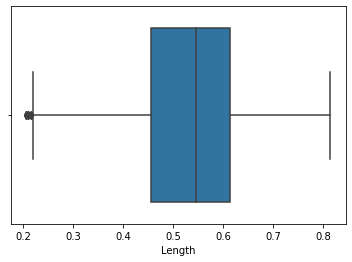

In [ ]:
sns.boxplot(data.Length)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


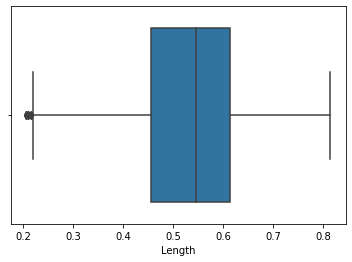

In [ ]:
sns.boxplot(data.Length)

In [ ]:
q1=data.Height.quantile(0.25)  #(Q1)
q3=data.Height.quantile(0.75)  #(Q3)
IQR=q3-q1
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [ ]:
upper_limit

0.24000000000000002

In [ ]:
lower_limit

0.039999999999999994

In [ ]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.5450
Diameter           0.4250
Height             0.1400
Whole_weight       0.7995
Shucked_weight     0.3360
Viscera_weight     0.1710
Shell_weight       0.2340
Age               11.0000
dtype: float64

In [ ]:
data['Height']= np.where(data['Height']<lower_limit,0.1400,data['Height'])
data['Height']= np.where(data['Height']>upper_limit,0.1400,data['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


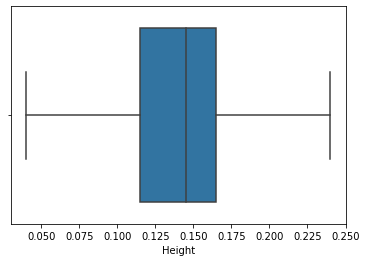

In [ ]:
sns.boxplot(data.Height)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


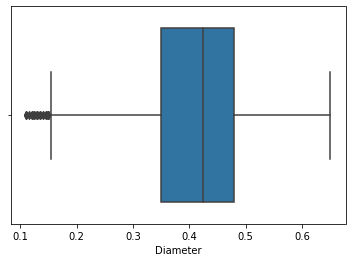

In [ ]:
sns.boxplot(data.Diameter)

In [ ]:
q1=data.Diameter.quantile(0.25)  #(Q1)
q3=data.Diameter.quantile(0.75)  #(Q3)
IQR=q3-q1
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [ ]:
upper_limit

0.675

In [ ]:
lower_limit

0.15499999999999997

In [ ]:
data.median()

Sex                1.0000
Length             0.5450
Diameter           0.4250
Height             0.1450
Whole_weight       0.7995
Shucked_weight     0.3360
Viscera_weight     0.1710
Shell_weight       0.2340
Age               11.0000
dtype: float64

In [ ]:
data['Diameter']= np.where(data['Diameter']<lower_limit, 0.4250,data['Diameter'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


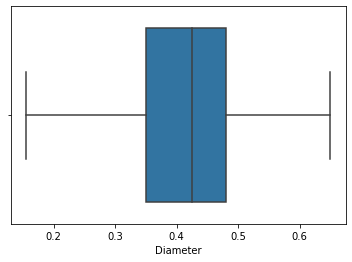

In [ ]:
sns.boxplot(data.Diameter)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


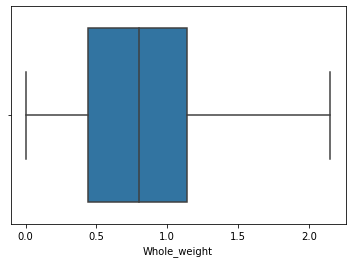

In [ ]:
sns.boxplot(data.Whole_weight)

In [ ]:
q1=data.Whole_weight.quantile(0.25)  #(Q1)
q3=data.Whole_weight.quantile(0.75)  #(Q3)
IQR=q3-q1
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [ ]:
upper_limit

2.18025

In [ ]:
lower_limit

-0.60175

In [ ]:
data.median()

Sex                1.0000
Length             0.5450
Diameter           0.4250
Height             0.1450
Whole_weight       0.7995
Shucked_weight     0.3360
Viscera_weight     0.1710
Shell_weight       0.2340
Age               11.0000
dtype: float64

In [ ]:
data['Whole_weight']= np.where(data['Whole_weight']>upper_limit,0.7995,data['Whole_weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


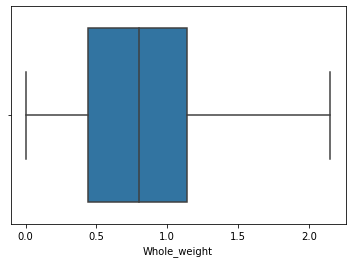

In [ ]:
sns.boxplot(data.Whole_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


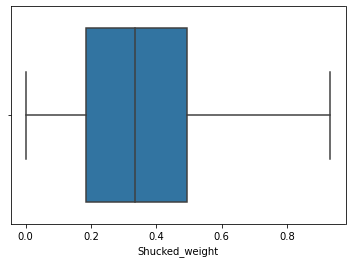

In [ ]:
sns.boxplot(data.Shucked_weight)

In [ ]:
q1=data.Shucked_weight.quantile(0.25)  #(Q1)
q3=data.Shucked_weight.quantile(0.75)  #(Q3)
IQR=q3-q1
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [ ]:
upper_limit

0.9535

In [ ]:
lower_limit


-0.2745

In [ ]:
data.median()

Sex                1.0000
Length             0.5450
Diameter           0.4250
Height             0.1450
Whole_weight       0.7995
Shucked_weight     0.3360
Viscera_weight     0.1710
Shell_weight       0.2340
Age               11.0000
dtype: float64

In [ ]:
data['Shucked_weight']= np.where(data['Shucked_weight']>upper_limit,0.3360,data['Shucked_weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


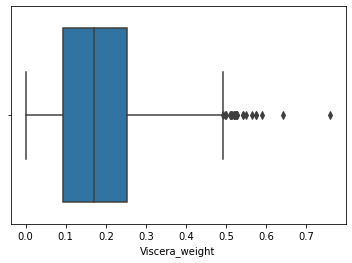

In [ ]:
sns.boxplot(data.Viscera_weight)

In [ ]:
q1=data.Viscera_weight.quantile(0.25)  #(Q1)
q3=data.Viscera_weight.quantile(0.75)  #(Q3)
IQR=q3-q1
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [ ]:
upper_limit

0.49225

In [ ]:
lower_limit

-0.14575000000000002

In [ ]:
data.median()

Sex                1.0000
Length             0.5450
Diameter           0.4250
Height             0.1450
Whole_weight       0.7995
Shucked_weight     0.3360
Viscera_weight     0.1710
Shell_weight       0.2340
Age               11.0000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


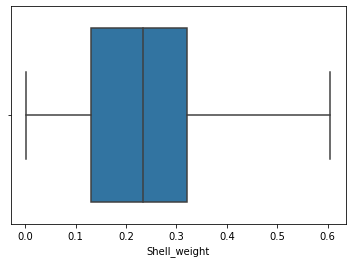

In [ ]:
sns.boxplot(data.Shell_weight)

In [ ]:
q1=data.Shell_weight.quantile(0.25)  #(Q1)
q3=data.Shell_weight.quantile(0.75)  #(Q3)
IQR=q3-q1
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [ ]:
lower_limit

-0.15649999999999997

In [ ]:
upper_limit

0.6074999999999999

In [ ]:
data.median()

Sex                1.0000
Length             0.5450
Diameter           0.4250
Height             0.1450
Whole_weight       0.7995
Shucked_weight     0.3360
Viscera_weight     0.1710
Shell_weight       0.2340
Age               11.0000
dtype: float64

In [ ]:
data['Shell_weight']= np.where(data['Shell_weight']>upper_limit,0.2340,data['Shell_weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


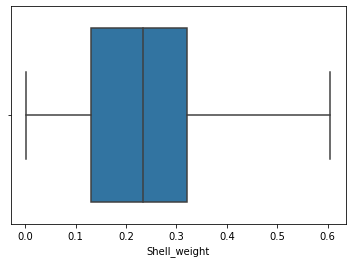

In [ ]:
sns.boxplot(data.Shell_weight)

##Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
l=LabelEncoder()

In [ ]:
data.Sex=l.fit_transform(data.Sex)

In [ ]:
data.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,17
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,9
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,11
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,12
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,9
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,10
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,22
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,18
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,11
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,21


In [ ]:
data.corr()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
Sex,1.000000,-0.032999,-0.035934,-0.042163,-0.036316,-0.025442,-0.032067,-0.037594,-0.034627
Length,-0.032999,1.000000,0.973234,0.871699,0.900926,0.875633,0.892640,0.882313,0.516360
Diameter,-0.035934,0.973234,1.000000,0.871760,0.896033,0.867332,0.885061,0.885102,0.528001
Height,-0.042163,0.871699,0.871760,1.000000,0.866831,0.816282,0.857987,0.873417,0.592028
Whole_weight,-0.036316,0.900926,0.896033,0.866831,1.000000,0.937270,0.924340,0.930516,0.539403
Shucked_weight,-0.025442,0.875633,0.867332,0.816282,0.937270,1.000000,0.877777,0.852964,0.432109
Viscera_weight,-0.032067,0.892640,0.885061,0.857987,0.924340,0.877777,1.000000,0.889800,0.503819
Shell_weight,-0.037594,0.882313,0.885102,0.873417,0.930516,0.852964,0.889800,1.000000,0.603092
Age,-0.034627,0.516360,0.528001,0.592028,0.539403,0.432109,0.503819,0.603092,1.000000


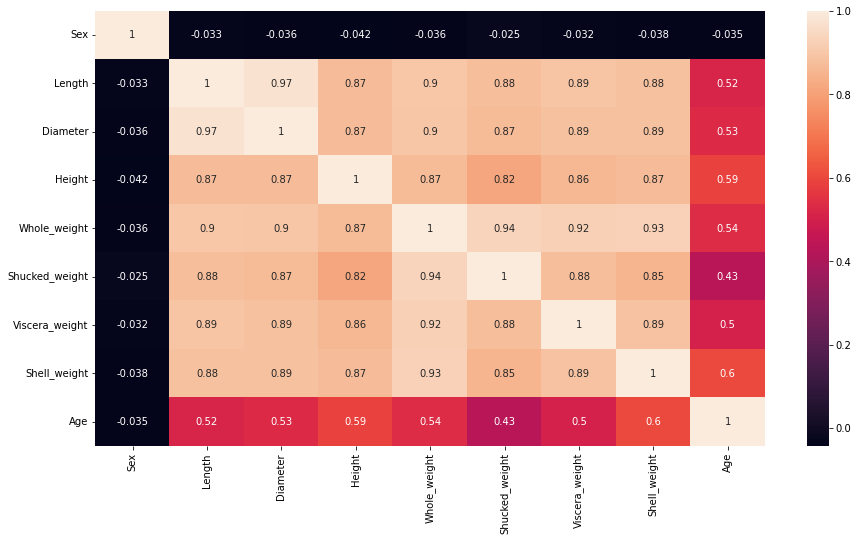

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.corr().Age.sort_values(ascending=False)

Age               1.000000
Shell_weight      0.603092
Height            0.592028
Whole_weight      0.539403
Diameter          0.528001
Length            0.516360
Viscera_weight    0.503819
Shucked_weight    0.432109
Sex              -0.034627
Name: Age, dtype: float64

In [ ]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,17
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,9
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,11
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,12
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,9


##X and Y Split

In [ ]:
y=data['Age']
y

0       17
1        9
2       11
3       12
4        9
        ..
4172    13
4173    12
4174    11
4175    12
4176    14
Name: Age, Length: 4177, dtype: int64

In [ ]:
X=data.drop(columns=['Age'],axis=1)
X.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320


##Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [ ]:
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1.0,0.409836,0.424242,0.275,0.238306,0.239807,0.132324,0.246065
1,1.0,0.237705,0.222222,0.250,0.104026,0.105687,0.063199,0.113505
2,0.0,0.532787,0.535354,0.475,0.314173,0.274142,0.185648,0.345485
3,1.0,0.385246,0.424242,0.425,0.239237,0.230150,0.149440,0.254350
4,0.5,0.204918,0.202020,0.200,0.094485,0.094957,0.051350,0.088650


##Train test split

In [ ]:
data.shape

(4177, 9)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape

(3341, 8)

In [ ]:
x_test.shape

(836, 8)

In [ ]:
y_train.shape

(3341,)

In [ ]:
y_test.shape

(836,)

##Model building

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [ ]:
linear.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred_test= linear.predict(x_test)
pred_test

array([14.14401049, 11.26166493, 12.14391962,  7.99557798, 13.0245607 ,
       13.53849836,  9.91622466, 11.5147403 , 10.70700114, 13.29060511,
       10.59861396,  8.75969944, 10.20979359, 10.88720034,  8.2947302 ,
       11.90249932,  9.67940106, 15.468363  , 13.64154176,  9.9348453 ,
        9.66366722,  8.88368053, 10.83531641,  9.65430978, 11.96202983,
       13.06681068, 11.06658835, 14.93783522, 12.14873   , 12.58521322,
        9.87982711, 11.02553421, 13.29775606, 15.97250931,  9.71934249,
       11.16655937, 11.21725023, 12.76128805, 10.74798305, 13.74592059,
       13.63344574, 11.21416184, 13.44274653, 13.36605446, 14.00884965,
       11.17657622, 11.67428269, 14.0158482 , 14.2683739 , 10.00657354,
       13.11836023,  9.39981309, 10.63346984, 15.19171942, 11.35596141,
        9.63090306,  8.3929529 ,  9.3065494 ,  9.38416281,  9.20457473,
       11.63138195, 11.49118057, 11.92093302, 10.32966403, 10.03196775,
       14.57305518, 14.91996237, 14.69261058, 11.34075264, 16.32

In [ ]:
y_test

668     15
1580    10
3784    13
463      7
2615    14
        ..
575     13
3231    14
1084     9
290     19
2713     6
Name: Age, Length: 836, dtype: int64

In [ ]:
pred_train = linear.predict(x_train)
pred_train

array([ 8.86788258,  9.83758846, 15.18621738, ..., 11.60757688,
       13.31750777, 10.36757369])

In [ ]:
Rings=pd.DataFrame({'Actual_y_value':y_test,'Predicted_y_value':pred_test})
Rings.head(10)

,Actual_y_value,Predicted_y_value
668,15,14.144010
1580,10,11.261665
3784,13,12.143920
463,7,7.995578
2615,14,13.024561
1399,13,13.538498
2054,9,9.916225
2058,10,11.514740
217,9,10.707001
1931,11,13.290605


In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_test), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, pred_test), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred_test), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_test), 2)) 
print("R2 score =", round(sm.r2_score(y_test, pred_test), 2))

Mean absolute error = 1.7
Mean squared error = 5.69
Median absolute error = 1.23
Explain variance score = 0.48
R2 score = 0.48
